In [2]:
!unzip '/content/drive/MyDrive/Colab Notebooks/dataset/archive.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/dataset/archive.zip
   creating: archive/
  inflating: __MACOSX/._archive      
  inflating: archive/.DS_Store       
  inflating: __MACOSX/archive/._.DS_Store  
   creating: archive/test_data/
   creating: archive/train_data/
  inflating: archive/test_data/.DS_Store  
  inflating: __MACOSX/archive/test_data/._.DS_Store  
   creating: archive/test_data/test_data/
  inflating: archive/train_data/.DS_Store  
  inflating: __MACOSX/archive/train_data/._.DS_Store  
   creating: archive/train_data/train_data/
   creating: archive/test_data/test_data/cbrtsh/
   creating: archive/test_data/test_data/hsparo/
   creating: archive/test_data/test_data/gretit/
   creating: archive/test_data/test_data/cmnmyn/
   creating: archive/test_data/test_data/himbul/
   creating: archive/test_data/test_data/indvul/
   creating: archive/test_data/test_data/mgprob/
   creating: archive/test_data/test_data/rebimg/
   creating: archive/test_data/test_data/himgri/
 

# Data Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)

In [5]:
train = train_gen.flow_from_directory('/content/archive/train_data/train_data',
                                      target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/archive/test_data/test_data',
                                    target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [6]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

# CNN

In [7]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)


Epoch 1/10
19/19 [==============================] - 103s 5s/step - loss: 3.4061 - accuracy: 0.0600 - val_loss: 2.7922 - val_accuracy: 0.0382
Epoch 2/10
19/19 [==============================] - 91s 5s/step - loss: 2.6599 - accuracy: 0.0400 - val_loss: 2.7233 - val_accuracy: 0.0510
Epoch 3/10
19/19 [==============================] - 90s 5s/step - loss: 2.5071 - accuracy: 0.1467 - val_loss: 2.6727 - val_accuracy: 0.1465
Epoch 4/10
19/19 [==============================] - 90s 5s/step - loss: 2.2735 - accuracy: 0.2200 - val_loss: 2.6993 - val_accuracy: 0.1592
Epoch 5/10
19/19 [==============================] - 89s 5s/step - loss: 2.2063 - accuracy: 0.2333 - val_loss: 2.7422 - val_accuracy: 0.1720
Epoch 6/10
19/19 [==============================] - 90s 5s/step - loss: 1.9856 - accuracy: 0.3000 - val_loss: 2.6662 - val_accuracy: 0.2293
Epoch 7/10
19/19 [==============================] - 90s 5s/step - loss: 1.8880 - accuracy: 0.3800 - val_loss: 2.6177 - val_accuracy: 0.2357
Epoch 8/10
19/19 [=

In [11]:
model.save('BirdsWeights.h5')


# Testing

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

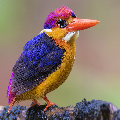

In [14]:
img = image.load_img('/content/kingfisher.jpeg',target_size=(120,120))
img

In [15]:
img = image.img_to_array(img)
img

array([[[149., 172., 130.],
        [147., 170., 126.],
        [146., 167., 124.],
        ...,
        [157., 145., 131.],
        [155., 143., 129.],
        [157., 143., 130.]],

       [[148., 171., 127.],
        [147., 170., 126.],
        [148., 170., 124.],
        ...,
        [157., 143., 130.],
        [155., 141., 128.],
        [157., 143., 130.]],

       [[147., 170., 124.],
        [149., 171., 124.],
        [147., 169., 122.],
        ...,
        [157., 144., 128.],
        [157., 143., 130.],
        [158., 144., 131.]],

       ...,

       [[ 72.,  73.,  94.],
        [ 73.,  96., 148.],
        [ 54.,  55.,  73.],
        ...,
        [ 69.,  67.,  89.],
        [ 78.,  86., 125.],
        [ 86.,  99., 152.]],

       [[ 57.,  63.,  63.],
        [ 53.,  52.,  58.],
        [ 31.,  30.,  25.],
        ...,
        [ 63.,  64.,  82.],
        [ 58.,  62.,  73.],
        [ 56.,  64., 100.]],

       [[ 90., 107., 179.],
        [ 50.,  59.,  88.],
        [ 41.,  

In [16]:
img = np.expand_dims(img,axis=0)
img
     

array([[[[149., 172., 130.],
         [147., 170., 126.],
         [146., 167., 124.],
         ...,
         [157., 145., 131.],
         [155., 143., 129.],
         [157., 143., 130.]],

        [[148., 171., 127.],
         [147., 170., 126.],
         [148., 170., 124.],
         ...,
         [157., 143., 130.],
         [155., 141., 128.],
         [157., 143., 130.]],

        [[147., 170., 124.],
         [149., 171., 124.],
         [147., 169., 122.],
         ...,
         [157., 144., 128.],
         [157., 143., 130.],
         [158., 144., 131.]],

        ...,

        [[ 72.,  73.,  94.],
         [ 73.,  96., 148.],
         [ 54.,  55.,  73.],
         ...,
         [ 69.,  67.,  89.],
         [ 78.,  86., 125.],
         [ 86.,  99., 152.]],

        [[ 57.,  63.,  63.],
         [ 53.,  52.,  58.],
         [ 31.,  30.,  25.],
         ...,
         [ 63.,  64.,  82.],
         [ 58.,  62.,  73.],
         [ 56.,  64., 100.]],

        [[ 90., 107., 179.],
       

In [17]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 130ms/step


15

# testing1

In [18]:
img1 = image.load_img('/content/kingfisher.jpeg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
15
wcrsrt


# testing2

In [20]:
img1 = image.load_img('/content/Dove.jpg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 18ms/step
0
blasti


# testing3

In [21]:
img1 = image.load_img('/content/sparrow.jpg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 20ms/step
0
blasti


In [25]:
model.save('birdsBeforeTuning.h5')

#As we can see it is giving error for some testing instances also the accuracy is not very good. So we will go for Model Tuning

In [22]:
#case 1: adding more feature extraction layers
model = Sequential()
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(62,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 118, 118, 12)      336       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 12)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 24)        2616      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 24)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 36)        7812      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 36)      

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [26]:
model.fit(train,batch_size=8,validation_data=test,epochs=50)

Epoch 1/50
19/19 [==============================] - 93s 5s/step - loss: 2.7893 - accuracy: 0.1000 - val_loss: 2.7625 - val_accuracy: 0.1019
Epoch 2/50
19/19 [==============================] - 87s 5s/step - loss: 2.7140 - accuracy: 0.1267 - val_loss: 2.7051 - val_accuracy: 0.1592
Epoch 3/50
19/19 [==============================] - 86s 5s/step - loss: 2.5715 - accuracy: 0.1867 - val_loss: 2.7894 - val_accuracy: 0.1274
Epoch 4/50
19/19 [==============================] - 87s 5s/step - loss: 2.5327 - accuracy: 0.1867 - val_loss: 2.7954 - val_accuracy: 0.1274
Epoch 5/50
19/19 [==============================] - 88s 5s/step - loss: 2.4944 - accuracy: 0.1867 - val_loss: 2.7261 - val_accuracy: 0.1274
Epoch 6/50
19/19 [==============================] - 88s 5s/step - loss: 2.4284 - accuracy: 0.2000 - val_loss: 2.7420 - val_accuracy: 0.1783
Epoch 7/50
19/19 [==============================] - 88s 5s/step - loss: 2.3672 - accuracy: 0.2133 - val_loss: 2.6952 - val_accuracy: 0.2102
Epoch 8/50
19/19 [==

In [27]:
# Testing 1
img1 = image.load_img('/content/t1.jpeg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 154ms/step
7
himbul


In [28]:
# Testing 2
img1 = image.load_img('/content/t2.jpeg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
7
himbul


In [29]:
# Testing 3
img1 = image.load_img('/content/t3.jpeg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
0
blasti


In [31]:
# Testing 4
img1 = image.load_img('/content/t4.jpeg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 21ms/step
0
blasti


In [32]:
model.save('birdsAfterTuning.h5')